In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
plt.style.use('seaborn-poster')
%matplotlib inline

## Generate data

Let's first generate a toy dataset that we will use a Random Forest model to fit it. We generate a periodical dataset using two sine wave with different period, and then add some noise to it. It can be visualized in the following figure:

<Container object of 3 artists>

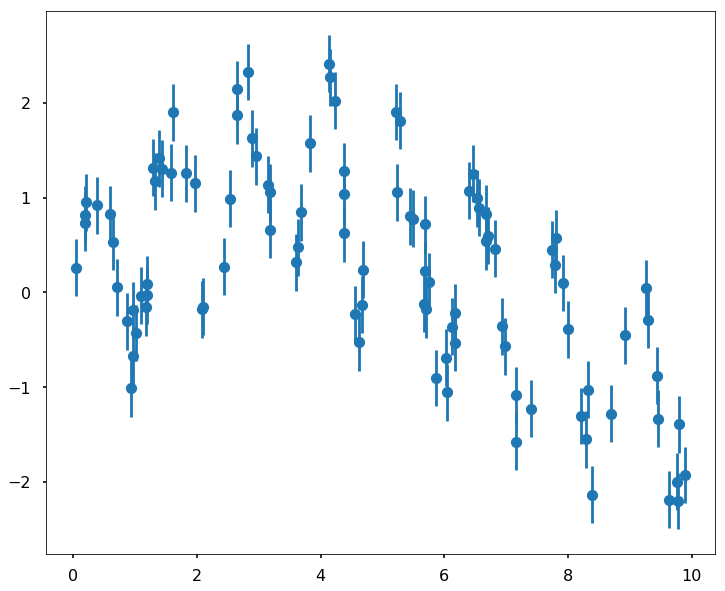

In [2]:
np.random.seed(0)
x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

plt.figure(figsize = (12,10))
y = model(x)
plt.errorbar(x, y, 0.3, fmt='o')

## Fit a Random Forest Model

In this section, we fit a random forest model with 100 trees, and all the other parameters are using the default. 

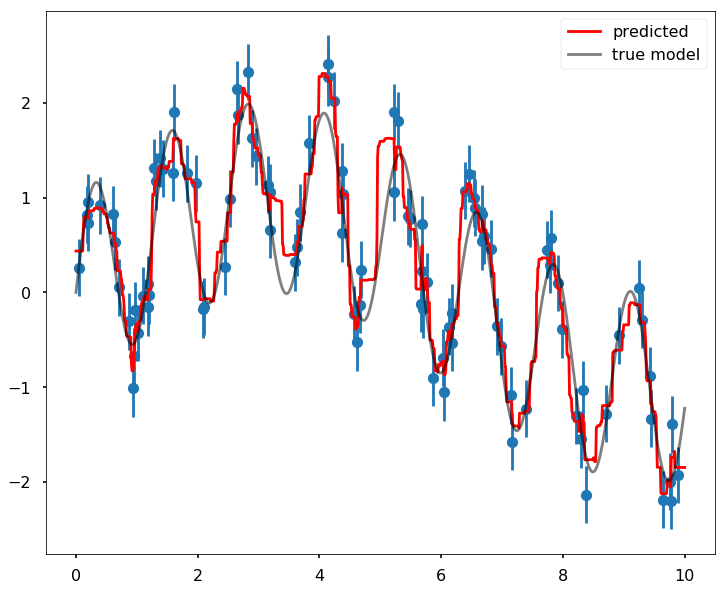

In [3]:
xfit = np.linspace(0, 10, 1000)

# fit the model and get the estimation for each data points
yfit = RandomForestRegressor(100, random_state=42).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

plt.figure(figsize = (12,10))
plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r', label = 'predicted', zorder = 10)
plt.plot(xfit, ytrue, '-k', alpha=0.5, label = 'true model', zorder = 10)
plt.legend()

Print out the misfit using the mean squared error.

In [4]:
mse = mean_squared_error(ytrue, yfit)
print(mse)

0.0869576380256


## Using ANN

We can also use ANN for regression as well, the difference will be at the activation function in the output layer. Instead of using some functions like tanh or sigmoid to squeenze the results to a range between 0 and 1, we can use some linear activation function to generate any results. 

In [5]:
from sklearn.neural_network import MLPRegressor

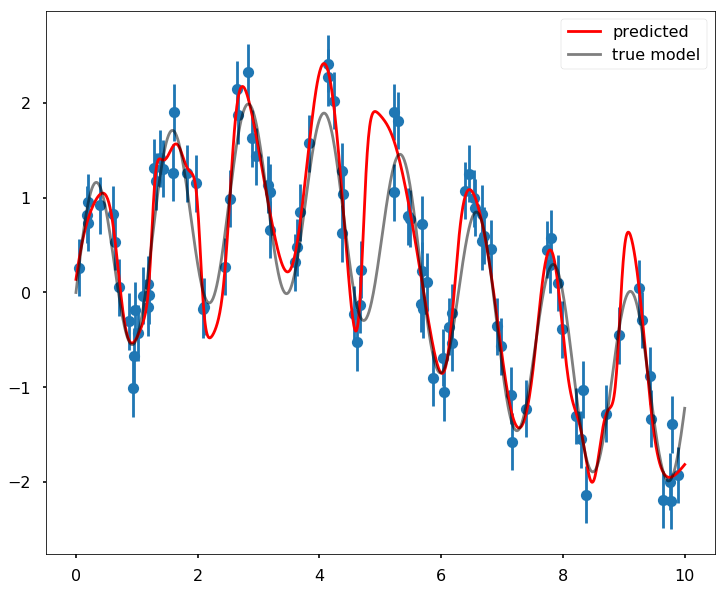

In [6]:
mlp = MLPRegressor(hidden_layer_sizes=(200,200,200), max_iter = 2000, solver='lbfgs', \
                   alpha=0.01, activation = 'tanh', random_state = 8)

yfit = mlp.fit(x[:, None], y).predict(xfit[:, None])

plt.figure(figsize = (12,10))
plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r', label = 'predicted', zorder = 10)
plt.plot(xfit, ytrue, '-k', alpha=0.5, label = 'true model', zorder = 10)
plt.legend()

In [7]:
mse = mean_squared_error(ytrue, yfit)
print(mse)

0.161981739823


## Exercise

The Support Vector Machine method we talked about in the previous notebook can also be used in regression. Instead of import svm, we import svr for regression probelm. In this exercise, please do the regression using support vector regression. You may need to ajust some parameters to get a better results, such as C, penalty parameter of the error term. You can find more descriptions [here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html).

In [8]:
from sklearn.svm import SVR

In [ ]:
# define your model
svr = 

# get the estimation from the model
yfit = 

# plot the results as above
plt.figure(figsize = (12,10))
plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r', label = 'predicted', zorder = 10)
plt.plot(xfit, ytrue, '-k', alpha=0.5, label = 'true model', zorder = 10)
plt.legend()

In [ ]:
%load ../solutions/solution_03.py